# Convulutional Neural Network (CNN)

# Step 1 | Imports Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")


# Load MINIST Data

In [2]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 106s 9us/step


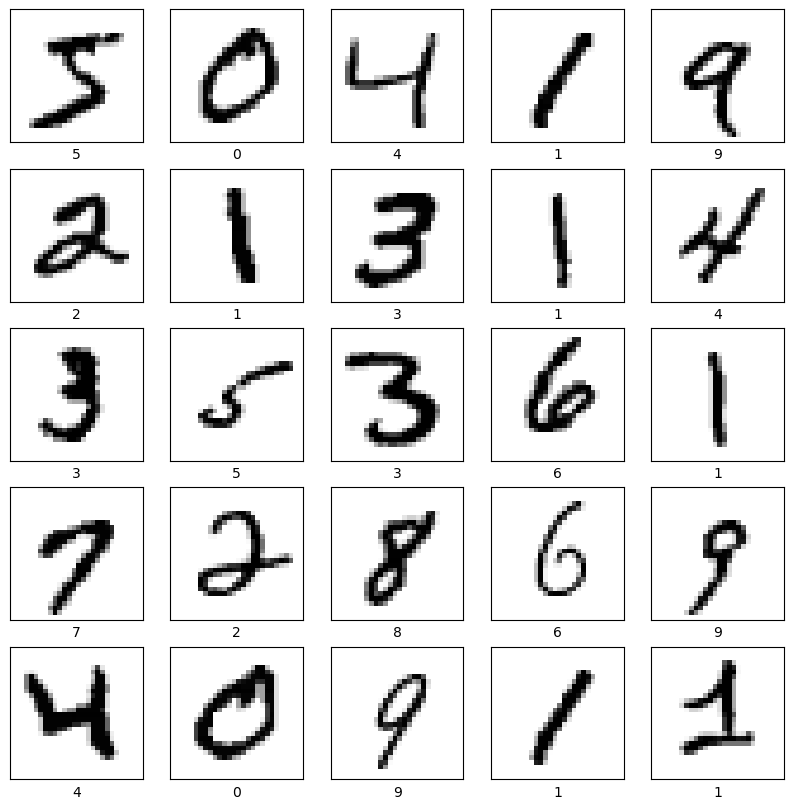

In [3]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Visualization 

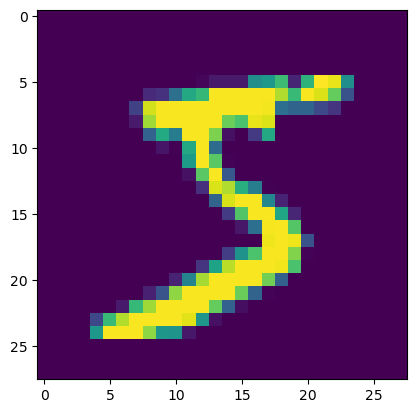

In [7]:
plt.imshow(X_train[0])

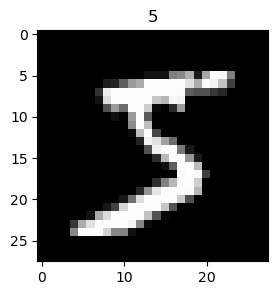

In [8]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0]);

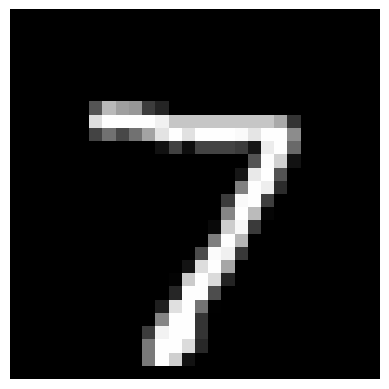

In [9]:
# Select an image from the dataset
import matplotlib.pyplot as plt
image_index = 0 
image = X_test[image_index]

# Display the original image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## Each time random Image

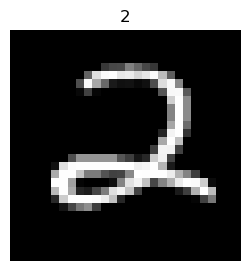

In [10]:
import random
random_image = random.randint(0,  len(X_train))

plt.figure(figsize=(3, 3))
plt.imshow(X_train[random_image], cmap="gray")

plt.title(y_train[random_image])
plt.axis(False);

In [11]:
X_train.shape,  X_test.shape

((60000, 28, 28), (10000, 28, 28))

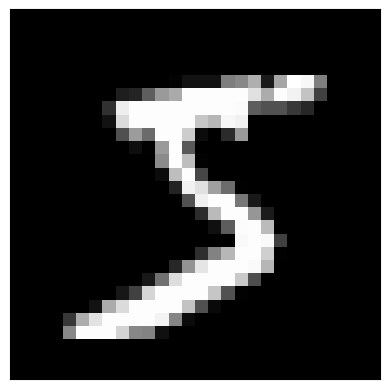

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [12]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

# Reshape tha Data

In [13]:

# reshape the data as we do not have 3rd value of an image
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

X_train.shape,  X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalize the data
Neural networks tend to like normalized data and perform better on it. 

Normalization, in simple terms, means to have the data at the same scale, that is, in our case, between 0 and 1. 

Let’s normalize our train and test images.

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train.shape,  X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
# also need to change the data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Build the model

In [17]:


# Create an input layer
input_layer = layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with 1 color channel (grayscale)

# Build the CNN model
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

In [19]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
# Define callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98:
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback() 

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2,callbacks=[back])

Epoch 1/100


750/750 [==============================] - 10s 12ms/step - loss: 0.4147 - accuracy: 0.8725 - val_loss: 0.1461 - val_accuracy: 0.9564
Epoch 2/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1304 - accuracy: 0.9611 - val_loss: 0.1085 - val_accuracy: 0.9675
Epoch 3/100
750/750 [==============================] - 8s 10ms/step - loss: 0.0954 - accuracy: 0.9706 - val_loss: 0.0898 - val_accuracy: 0.9739
Epoch 4/100
750/750 [==============================] - 9s 12ms/step - loss: 0.0782 - accuracy: 0.9758 - val_loss: 0.0793 - val_accuracy: 0.9772
Epoch 5/100
749/750 [============================>.] - ETA: 0s - loss: 0.0642 - accuracy: 0.9800
Reached 98% accuracy so cancelling training!
750/750 [==============================] - 9s 12ms/step - loss: 0.0642 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy: 0.9803


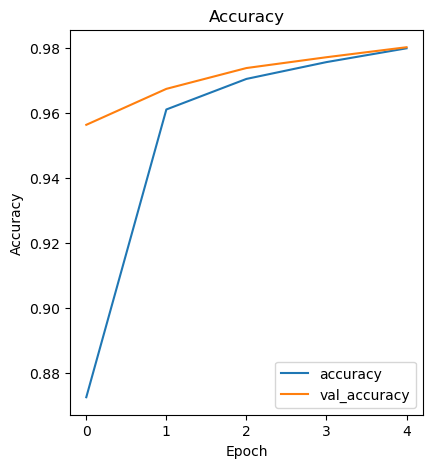

In [22]:
# plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

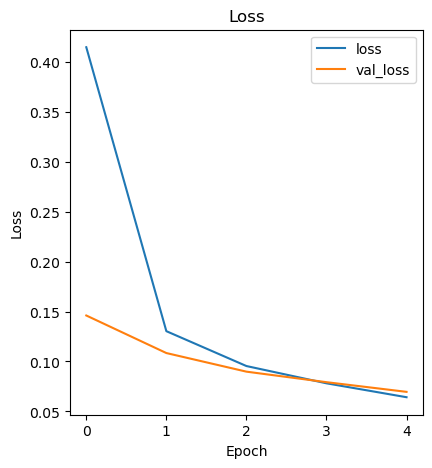

In [23]:
# model loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0539 - accuracy: 0.9817
Test Loss: 0.05389973148703575
Test Accuracy: 0.9817000031471252


In [25]:
# lets save the model
model.save("models/digit-recognizer.h5")

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [26]:
# Grab an image from the test dataset.
img = X_test[5]

print(img.shape)

(28, 28, 1)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [28]:
pred_digit = model.predict(img)
pred_digit

1/1 [==============================] - 0s 142ms/step


array([[8.3351901e-05, 9.9889308e-01, 2.2667393e-05, 8.7110112e-07,
        5.9036841e-04, 8.7262244e-08, 1.7729928e-05, 2.7080678e-04,
        8.7352877e-05, 3.3565244e-05]], dtype=float32)